In [38]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Q1 [12 points] Classification

Consider the following 2 datasets, each of which has equal numbers of red and blue points.

![both](both.png)

### Q1(a) [4 points] Suppose you can build a decision tree to classify the red points from the blue points. 
You can set the depth anywhere between 1 and 10 (recall that depth 1 means you get to split at most once).
Which depth gives you the best training accuracy for dataset 1? And for dataset 2?
If several choices for depth achieve the highest accuracy, report the smallest depth that achieves that accuracy.

**Depth = 10 gives best training accuracy on both dataset 1 and dataset 2. In dataset 1, tree can find cuts such as x > 1, y < -1 etc to segregate sections of blue and red. In dataset 2, since blue and red are closer together, same number of tree cuts as with dataset one might not achieve same accuracy. All trees with depth more than equal to 3 gives 100% accuracy on dataset1**

**For dataset 2, we will have more or less 50% misclassification rate since the datapoints are so close to each other. Tree with depth 10 gives best accuracy on train**

### Q1(b) [4 points] What is the accuracy achieved by logistic regression on dataset 1? On dataset 2?

For dataset 2, you may give an approximate answer assuming that the red and blue circles are very very close to each other.

**Since logistic also fit linear line internally and transforms into sigmoid, best accuracy for data 1 is with line y =-1, with all red points correctly classified and 2/3rd blue points misclassified, giving overall accuracy of 67%.**


**For dataset 2, since points are really close, all linear separators give 50% accuracy.**

### Q1(c) [4 points] What accuracy would a K-Nearest Neighbors algorithm achieve on dataset 1? On dataset 2?

You may assume a reasonably large value for K, say, K=20. You can also assume that the points are uniformly spread out over the circles, and for dataset 2, the two circles are very very close to each other.

**Assume k = 20, KNN gets 100% accuracy on dataset1 and 50% on dataset 2. Since KNN works with euclidean distance, in dataset 1 where both circles are far apart compared to distance between points, a good-enough K will be able to separate it out.In dataset 2, nearest neighbor of red point might be either red or blue with equal probability. Hence accuracy = 50%**

---

We will consider a dataset where each row is one active businesses in the Los Angeles area. We care about the following fields:
* BUSINESS NAME, STREET ADDRESS, CITY, ZIP CODE: self-explanatory
* MAILING ADDRESS, MAILING CITY, MAILING ZIP CODE: these correspond to locations where letters addressed to the business need to be mailed
* LOCATION DESCRIPTION: a column that combines the street name and zip code
* NAICS: North American Industry Classification System (essentially the type of business)
* PRIMARY NAICS DESCRIPTION: a description of the NAICS code
* COUNCIL DISTRICT: another location identifier
* LOCATION START DATE: when did the business start using this location.

*Note*: You can assume that STREET ADDRESS has no NaNs. However, **there may be NaNs in all other columns, and your code may need to account for that if necessary!**

### Q2 [3 points] Read in "ActiveBusinesses.csv" and print the first line.

In [39]:
#Read data and parse date vars
df = pd.read_csv('ActiveBusinesses.csv',parse_dates=['LOCATION START DATE','LOCATION END DATE'])
df.iloc[0]

LOCATION ACCOUNT #                                           0002737837-0001-4
BUSINESS NAME                                            ERDEM ENTERPRISES LLC
DBA NAME                                                                   NaN
STREET ADDRESS                               6177 N LINCOLN AVENUE   UNIT #337
CITY                                                                   CHICAGO
ZIP CODE                                                            60659-2313
LOCATION DESCRIPTION                                        6177 LINCOLN 60659
MAILING ADDRESS                          5805   WHITE OAK AVENUE   UNIT #16999
MAILING CITY                                                            ENCINO
MAILING ZIP CODE                                                    91416-5052
NAICS                                                                 512100.0
PRIMARY NAICS DESCRIPTION    Motion picture & video industries (except vide...
COUNCIL DISTRICT                                    

In [40]:
df.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0002737837-0001-4,ERDEM ENTERPRISES LLC,NaN,6177 N LINCOLN AVENUE UNIT #337,CHICAGO,60659-2313,6177 LINCOLN 60659,5805 WHITE OAK AVENUE UNIT #16999,ENCINO,91416-5052,512100.0,Motion picture & video industries (except vide...,0,2014-03-13,NaT,"(41.9939, -87.7129)"
1,0002692060-0001-4,7348 TUJUNGA AVE LLC,NaN,7348 TUJUNGA AVENUE,NORTH HOLLYWOOD,91605-3927,7348 TUJUNGA 91605-3927,21738 NICOLLE AVENUE,CARSON,90745-7564,532290.0,Other consumer goods rental,2,2013-07-17,NaT,"(34.2038, -118.379)"
2,0003012013-0001-1,MIKA GUROVICH PRODUCTION,NaN,11224 RICHARD AVENUE UNIT #4,LOS ANGELES,90064-,11224 RICHARD 90064-,NaN,NaN,NaN,541920.0,Photographic services,0,2017-01-18,NaT,"(0.0, 0.0)"
3,0002490453-0001-1,LINDA S NELSON TRUST,NaN,771 E 14TH STREET,LOS ANGELES,90021-2113,771 14TH 90021-2113,6 WILLIAMSBURG LANE,COTO DE CAZA,92679-5024,531100.0,Lessors of real estate (including mini warehou...,14,2010-03-01,NaT,"(34.0311, -118.2523)"
4,0003162145-0001-6,ZJH ENTERPRISE LLC,NaN,9615 BOLTON ROAD,LOS ANGELES,90034-1041,9615 Bolton 90034-1041,NaN,NaN,NaN,512100.0,Motion picture & video industries (except vide...,5,2017-01-01,NaT,"(34.0452, -118.3974)"


### Q3 [4 points] Businesses with the same street address.

Find the most frequent STREET ADDRESS (i.e., the STREET ADDRESS that shows up in the most rows). List all the BUSINESS NAMEs at that STREET ADDRESS.

In [41]:
addr = df['STREET ADDRESS'].value_counts().index.values[0]
addr

'15821 VENTURA BLVD SUITE #370'

In [42]:
df['BUSINESS NAME'][df['STREET ADDRESS'] == addr]

3258              HYPERSONIC, INC.
4033              TWIN ENGINES LLC
7397               COMANDANTE, LLC
8901     PHILIP CHRISTOPHER HARVEY
10108      DIA DE LOS DEFTONES LLC
10278    SMOKIN CAMELS CARAVAN INC
13022            BVB TOURING, INC.
16371           ELLA MAI MUSIC INC
17100                   EMMIT FENN
17737                KIDD KASH INC
19533                 HOT MILK INC
19597                  CC BLUE INC
Name: BUSINESS NAME, dtype: object

### Q4 [4 points] Plot the top 10 most frequent BUSINESS NAMEs.
The x-axis should be the BUSINESS NAME, and the y-axis should be the number of rows with that BUSINESS NAME.

<AxesSubplot:>

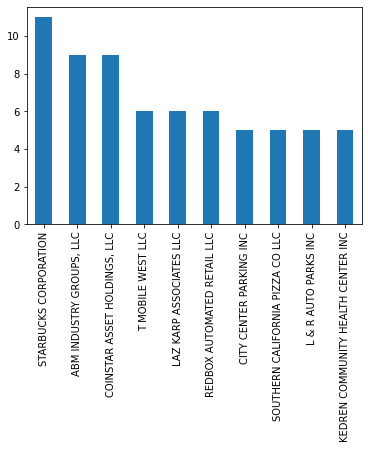

In [43]:
df['BUSINESS NAME'].value_counts()[0:10].plot(kind='bar')

### Q5 [4 points] Top street names

Define the street name as the LOCATION DESCRIPTION without the first word (street number) and the last word (the zip code).
Print the frequencies of the top 10 street names.

In [44]:
df_dropped = df.dropna(subset = ['LOCATION DESCRIPTION'])
df_dropped['LOCATION DESCRIPTION'].apply(lambda s: ' '.join(s.split()[1:-1])).value_counts()[:10]

VENTURA         579
WILSHIRE        513
OLYMPIC         157
FIGUEROA        148
SHERMAN         146
SUNSET          145
SANTA MONICA    135
SEPULVEDA       133
PICO            132
WESTERN         128
Name: LOCATION DESCRIPTION, dtype: int64

### Q6 [4 points] Plot the frequencies of the top-10 cities except LOS ANGELES.

<AxesSubplot:>

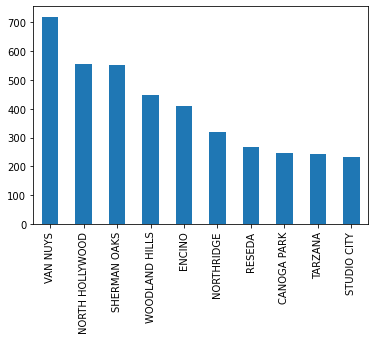

In [45]:
df['CITY'][df['CITY']  != 'LOS ANGELES'].value_counts()[0:10].plot(kind='bar')

### Q7 [4 points] Among rows where both ZIP CODE and MAILING ZIP CODE are not missing, what fraction of rows have different values for these two columns?

In [46]:
df_zip = df[(df['ZIP CODE'].notnull()) & (df['MAILING ZIP CODE'].notnull())]
len_zip = len(df_zip[df_zip['ZIP CODE'] != df_zip['MAILING ZIP CODE']])
len_zip/len(df_zip)

0.5952614059134521

### Q8 [4 points] How many unique STREET ADDRESSes have a single character as their second word?

For example, the second word of "1155 N LA CIENEGA BLVD" is "N".

In [47]:
df['WORDS'] = df['STREET ADDRESS'].str.split()

In [48]:
df['WORDS 2'] = df['WORDS'].map(lambda x : x[1] if len(x)>1 else 'Unknown' )

In [49]:
df['STREET ADDRESS'][df['WORDS 2'].map(lambda x : len(x)) == 1].nunique()

5950

### Q9 [4 points] Among rows where NAICS is not missing, what fraction also have PRIMARY NAICS DESCRIPTION also not missing?

In [50]:
len1 = len(df[df['NAICS'].notnull()])
len2 = len(df[(df['NAICS'].notnull())  & (df['PRIMARY NAICS DESCRIPTION'].notnull())])
len2/len1

1.0

### Q10 [4 points] Find all unique BUSINESS NAMEs where the CITY in which the business is located is part of the BUSINESS NAME.

For example, "LOS ANGELES VALLEY CAREGIVERS, INC." in the city of LOS ANGELES.

In [51]:
mask1 = df.apply(lambda x: str(x['CITY']) in str(x['BUSINESS NAME']), axis=1)

In [52]:
df[mask1]['BUSINESS NAME'].unique()

array(['LOS ANGELES DRAMA CLUB', 'RESEDA PHARMACY INC',
       'URBAN PARTNERS LOS ANGELES INC', 'SHERMAN OAKS-A, INC',
       'ENCINO STARDUST INVESTMENT COMPANY',
       'LOS ANGELES PSYCHOANALYTIC SOCIETY & INSTITUTE',
       'EL LEON CIGARS DE LOS ANGELES INC',
       'ONTARIO CHAMMBER OF COMMERCE', 'GALLAGHER DESIGNS LOS ANGELES',
       'VENICE ALE HOUSE LLC',
       'KIDS ENJOY EXERCISE NOW (KEEN) LOS ANGELES LLC',
       'COTNER LOS ANGELES LLC', 'LOS ANGELES MOBILE TRUCK WASH LLC',
       'CANOGA PARK COMMUNITY CENTER',
       'VALLEY VILLAGE MANAGEMENT CORPORATION',
       '1533 N MCCADDEN PLACE LOS ANGELES CA 90028 FAMILY TRUST',
       'A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C',
       'LOS ANGELES KIDNEY CENTER A PMC', 'TARZANA LOCK AND SAFE INC',
       'METROPOLIS LOS ANGELES LLC', 'ONTARIO SUPER 8 INC',
       'KOLLEL-LOS ANGELES /C', 'CITY OF LOS ANGELES',
       'SPAY NEUTER PROJECT OF LOS ANGELES INC',
       'LOS ANGELES SECURITY ACADEMY INC',
       'NATIONAL 

### Q11 [4 points] Print out all cities with 5 or more unique council districts associated with them.

In [53]:
df_num = df.groupby(['CITY'])['COUNCIL DISTRICT'].agg('nunique').to_frame('NumCountDist')
df_num = df_num[df_num['NumCountDist'] >= 5]
df_num.sort_values('NumCountDist').index.values

array(['ENCINO', 'NORTH HOLLYWOOD', 'NORTHRIDGE', 'SHERMAN OAKS',
       'VAN NUYS', 'LOS ANGELES'], dtype=object)

### Q12 [6 points] Multiple NAICS
Find all instances where there are several different NAICS for the same PRIMARY NAICS DESCRIPTION. Print out these NAICS and PRIMARY NAICS DESCRIPTIONs.

In [54]:
df_num2 = df.groupby(['PRIMARY NAICS DESCRIPTION'])['NAICS'].agg('nunique').to_frame(name = 'NumNAICS')
diffNAICS = df_num2[df_num2['NumNAICS'] > 1].index.values
diffNAICS

array(['Home furnishings stores'], dtype=object)

In [55]:
df[['NAICS','PRIMARY NAICS DESCRIPTION']][df['PRIMARY NAICS DESCRIPTION'].isin(diffNAICS)].drop_duplicates()

,NAICS,PRIMARY NAICS DESCRIPTION
696,445290.0,Home furnishings stores
919,442200.0,Home furnishings stores


### Q13 [6 points] Plot the frequency of street last-names.

The street last-name is defined as follows:
* Look at a STREET ADDRESS (e.g., "5670 WILSHIRE BLVD #B 1")
* Read its words backwards (here:, "1", "#B", "BLVD", "WILSHIRE", "5670")
* Pick the first word that doesn't have any digits or "#" in it (here: "BLVD")

Calculate the number of rows associated with each unique last-name. Plot the frequencies of the top 10 last-names.

In [56]:
df['LAST WORD'] = df['STREET ADDRESS'].str.replace('[\d\#]',"",regex=True).str.strip().str.split()
df['LAST WORD 2'] = df['LAST WORD'].map(lambda x : x[-1] if len(x) >= 1 else NaN)

In [57]:
#identified edge case 
df['STREET ADDRESS'][df['LAST WORD 2'].isnull()]

18220    915
Name: STREET ADDRESS, dtype: object

In [58]:
len(df['LAST WORD 2'].unique())

268

In [59]:
vc = df['LAST WORD 2'].value_counts()
vc

AVENUE    4749
STREET    4062
BLVD      2570
SUITE     1753
APT       1410
          ... 
RIBERA       1
ID           1
HQN          1
BESO         1
CRUZ         1
Name: LAST WORD 2, Length: 267, dtype: int64

<AxesSubplot:>

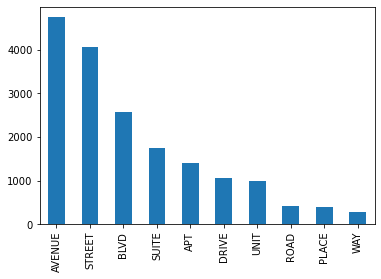

In [60]:
vc[0:10].plot(kind='bar')

### Q14 [6 points] Streets with the widest range of street numbers

* Drop all STREET ADDRESSES where the first word is not all numbers. For example, keep the row where the STREET ADDRESS is "15136 STAGG STREET" but drop the row with "POST OFFICE BOX 123".
* Among these STREET ADDRESSES, call the first word STREET NUMBER and the rest of the address STREET BASE.
    * For example, a STREET ADDRESS of "15136 STAGG STREET" has a STREET NUMBER of 15136 and a STREET BASE of "STAGG STREET"
* For each STREET BASE, figure out the range of STREET NUMBERs.
    * For example, if you see "15126 STAGG STREET", "15100 STAGG STREET" and "15200 STAGG STREET", then the range for "STAGG STREET" is 15200-15100=100.
* Print out the top 5 STREET BASEs with the largest range of STREET NUMBERs.

In [61]:
df['WORDS 1'] = df['WORDS'].map(lambda x : x[0])
df_dig = df[df['WORDS 1'].str.isdigit()].copy()

df_dig['STREET NUMBER'] = df_dig['WORDS 1'].astype('int')
df_dig['STREET BASE'] = df_dig['WORDS'].map(lambda x : ' '.join(x[1:]))

In [62]:
def rangeFunc(x):
    return x.max() - x.min()

df_dig.groupby(['STREET BASE'])['STREET NUMBER'].agg(rangeFunc).to_frame(name = 'Range').sort_values('Range',ascending=False)[0:5]

,Range
STREET BASE,
DUNN DRIVE,78397
ATLANTIC AVENUE,64710
CORPORATE DRIVE,34455
PACIFIC COAST HIGHWAY,30010
S WESTERN AVENUE,27962


### Q15 [6 points] Among MAILING CITIES that appear at least 50 times, what is the fraction of rows for which the MAILING ADDRESS contains the string "POST OFFICE BOX"?

In [63]:
vc2 = df['MAILING CITY'].value_counts()
CITY_ = vc2.index.values[vc2.values >= 50]

In [64]:
df['ContainPO'] = df['MAILING ADDRESS'].map(lambda x : 'POST OFFICE BOX' in str(x))
num_len = len(df[ (df['MAILING CITY'].isin(CITY_)) & (df['ContainPO']) ])
den_len = len(df[df['MAILING CITY'].isin(CITY_)])
num_len/den_len

0.07069261591299371

### Q16 [6 points] Business chains

* Find all BUSINESS NAMEs that are associated with 6 or more unique non-missing LOCATIONs.
* For each such BUSINESS NAME, print out a DataFrame with the index being the BUSINESS NAME and two columns:
    * the number of unique cities in which the business operates, and
    * the CITY with the maximum number of locations for this business (you need not consider unique locations here).

In [65]:
df_loc = df.groupby(['BUSINESS NAME'])['LOCATION'].agg('nunique').to_frame(name = 'NumLoc')
BUSINESS_ = df_loc[df_loc['NumLoc'] >= 6].index.values

In [66]:
df[df['BUSINESS NAME'].isin(BUSINESS_)].groupby(['BUSINESS NAME'])['CITY'].agg(['nunique',lambda x : x.value_counts().index.values[0]])

,nunique,<lambda_0>
BUSINESS NAME,,
"ABM INDUSTRY GROUPS, LLC",3,LOS ANGELES
"COINSTAR ASSET HOLDINGS, LLC",7,LOS ANGELES
LAZ KARP ASSOCIATES LLC,2,LOS ANGELES
REDBOX AUTOMATED RETAIL LLC,4,LOS ANGELES
STARBUCKS CORPORATION,6,LOS ANGELES
T MOBILE WEST LLC,6,SHERMAN OAKS


In [67]:
#For COINSTAR ASSET HOLDINGS, LLC both Van Nuys and LA are mode
df[df['BUSINESS NAME'] == "COINSTAR ASSET HOLDINGS, LLC"]['CITY'].value_counts()

LOS ANGELES          2
VAN NUYS             2
SAN PEDRO            1
PACIFIC PALISADES    1
WILMINGTON           1
WEST HILLS           1
NORTH HOLLYWOOD      1
Name: CITY, dtype: int64

### Q17 [6 points] Visualize Ventura

* Find all rows where the STREET ADDRESS contains "VENTURA BLVD".
* Look at the LOCATION column for these rows. These are in the form (latitude, longitude)
* Drop any rows where the LOCATION is missing or equals "(0.0, 0.0)"
* Extract the latitudes and longitudes. 
* Show a scatter plot of locations with latitude on the y-axis and longitude on the x-axis. These give a visualization of roads named Ventura Blvd.

In [68]:
df['ContainVentura'] = df['MAILING ADDRESS'].map(lambda x : 'VENTURA BLVD' in str(x))
df_latlong = df[(df['ContainVentura']) & (df['LOCATION'].notnull()) & (df['LOCATION'] != '(0.0, 0.0)') ].copy()
df_latlong.shape

(313, 23)

In [69]:
df_latlong['LAT'] = df_latlong['LOCATION'].map(lambda x : x.strip().split(', ')[0].lstrip('('))
df_latlong['LONG'] = df_latlong['LOCATION'].map(lambda x : x.strip().split(', ')[1].rstrip(')'))


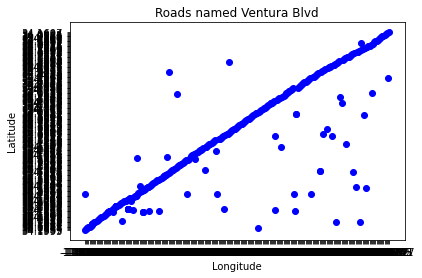

In [70]:
plot(df_latlong['LONG'], df_latlong['LAT'], marker='o', color='blue', linestyle='None')
xlabel('Longitude')
ylabel('Latitude')
title('Roads named Ventura Blvd')
show()

### Q18 [4 points] Plot the total number of rows for each month from 01/01/2000 to 01/01/2021.

In [71]:
df['LOCATION START DATE']

0       2014-03-13
1       2013-07-17
2       2017-01-18
3       2010-03-01
4       2017-01-01
           ...    
19995   2012-03-01
19996   2011-12-10
19997   1948-06-01
19998   1991-02-01
19999   2018-07-11
Name: LOCATION START DATE, Length: 20000, dtype: datetime64[ns]

In [72]:
df_date_fil = df[(df['LOCATION START DATE'] >= '2000-01-01') & (df['LOCATION START DATE'] <= '2021-01-01')  ].copy()

<AxesSubplot:xlabel='LOCATION START DATE'>

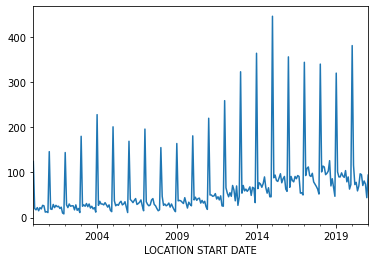

In [74]:

df_date_fil.set_index('LOCATION START DATE',inplace=True)
df_date_fil['dummy']=1
df_date_fil.resample('M',kind='Period')['dummy'].sum().plot()


---

### Autism Classification

We will consider a dataset where each row is an adult who may be autistic (Class/ASD is YES). We will only need the columns named A1_Score to A10_Score. These are scores achieved on answers to different questions measuring mental acuity. A score of 1 is a correct answer, while 0 is a wrong answer.

In [75]:
df = pd.read_csv('Autism-Adult-Data.arff', skiprows=25, header=None, \
                 names=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
                        'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
                        'gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
                        'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'])
df.iloc[0]

A1_Score                         1
A2_Score                         1
A3_Score                         1
A4_Score                         1
A5_Score                         0
A6_Score                         0
A7_Score                         1
A8_Score                         1
A9_Score                         0
A10_Score                        0
age                             26
gender                           f
ethnicity           White-European
jaundice                        no
austim                          no
country_of_res     'United States'
used_app_before                 no
result                           6
age_desc             '18 and more'
relation                      Self
Class/ASD                       NO
Name: 0, dtype: object

### Q19 [3 points] Create a target column which is 1 if Class/ASD is YES, and 0 otherwise.

Print out the baseline accuracy on this dataset.

In [76]:
df['Target'] = df['Class/ASD'].map(lambda x : 1 if x == 'YES' else 0)

### Q20 [6 points] Minimum number of questions

Calculate the average cross-validation accuracy for predicting the target using 10 different classifiers. Each classifier is a Nearest Neighbors classifier with K=15 nearest neighbors (all other settings can be set to their defaults), but with different features.
* Classifier 1 uses A1_Score
* Classifier 2 uses A1_Score and A2_Score
* Classifier 3 uses A1_Score, A2_Score, and A3_Score
* ...
* Classifier 10 uses A1_Score, A2_Score, ..., A10_Score

None of the classifiers use any of the other available columns such as age/gender/etc.

Find the maximum cross-validation accuracy among these 10 classifiers.
Then find out which classifiers achieve a cross-validation accuracy that is at least 95% of this maximum.
Among these, print out which classifier uses the fewest features.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold, train_test_split

In [78]:
acc_df = pd.DataFrame(columns=['Accuracy','Num Features'])

In [79]:
for i in range(1,11):
    
    X = df.iloc[:,0:i]
    Y = df['Target']
    clf = KNeighborsClassifier(n_neighbors=15)
    kf = cross_val_score(clf , X ,Y )
    acc_df.loc[i-1,'Accuracy'] = kf.mean()
    acc_df.loc[i-1,'Num Features'] = i

In [80]:
acc_df

,Accuracy,Num Features
0,0.657781,1
1,0.653516,2
2,0.779899,3
3,0.826697,4
4,0.894894,5
5,0.909037,6
6,0.93459,7
7,0.950233,8
8,0.964478,9
9,0.978693,10


Maximum accuracy for num features  = 10

In [81]:
acc_df[acc_df['Accuracy'] > 0.95]

,Accuracy,Num Features
7,0.950233,8
8,0.964478,9
9,0.978693,10


Classifiers with 8, 9, 10 give more than 95% accuracy

Classifier with fewest features is the one with A1-A8